# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

"# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives, bonds, publications"
columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications']

blast_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'

blast = pd.read_csv(blast_url,
                    skiprows=7,
                    names=columns,
                    usecols=columns,
                    na_values=['-', 'missing']).drop(columns='query acc.ver').set_index('subject acc.ver')

blast.head(5)

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0


### Question 2
What is the average number of publications?

In [236]:
blast['publications'].mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [237]:
blast['bonds'] = pd.to_numeric(blast['bonds'].astype('str').str.replace(',', ''), downcast='integer')
blast[blast['bonds'] > 15000].index

Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

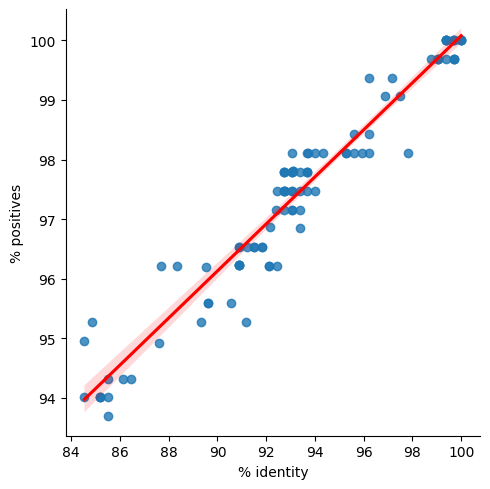

In [238]:
sns.lmplot(
    data = blast,
    x = '% identity',
    y = '% positives',
    line_kws={'color': 'red'}
)

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [239]:
protein_source_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv'

protein = pd.read_csv(protein_source_url).drop(columns=['Unnamed: 0'])

blast = blast.merge(protein, left_index=True, right_on="Protein", how="left").set_index("Protein")
blast['Protein source'] = blast['Source'].fillna('NA')
blast = blast.drop(columns=['Source'])
blast.rename_axis("subject acc.ver", inplace=True)
blast

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NA
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NA
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NA
ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NA
YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,GenPept
